<a href="https://colab.research.google.com/github/Shiwaninayak/FSM_Assessment-3/blob/main/K-%20mean%20clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Iris Dataset.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


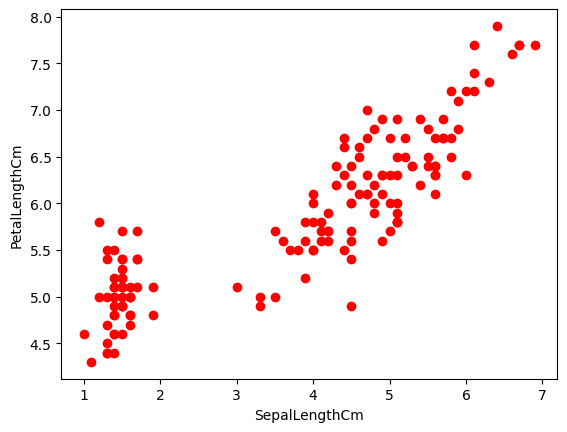

In [3]:
X = data[["SepalLengthCm","PetalLengthCm"]]
#Visualise data points
plt.scatter(X["PetalLengthCm"],X["SepalLengthCm"],c='red')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.show()

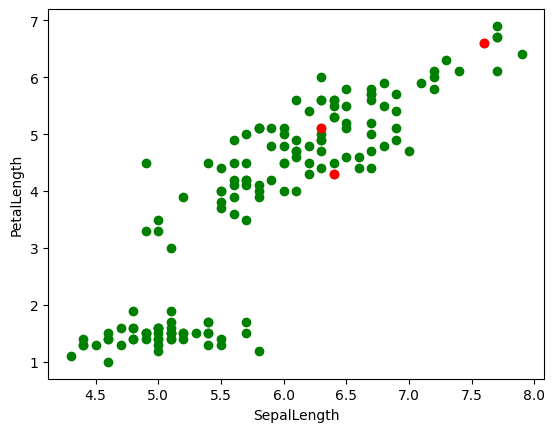

In [5]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["SepalLengthCm"],X["PetalLengthCm"],c='green')
plt.scatter(Centroids["SepalLengthCm"],Centroids["PetalLengthCm"],c='red')
plt.xlabel('SepalLength')
plt.ylabel('PetalLength')
plt.show()

In [6]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["SepalLengthCm"]-row_d["SepalLengthCm"])**2
            d2=(row_c["PetalLengthCm"]-row_d["PetalLengthCm"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["PetalLengthCm","SepalLengthCm"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['PetalLengthCm'] - Centroids['PetalLengthCm']).sum() + (Centroids_new['SepalLengthCm'] - Centroids['SepalLengthCm']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["PetalLengthCm","SepalLengthCm"]]

<ipython-input-6-fc3913ccc094>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-6-fc3913ccc094>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED
<ipython-input-6-fc3913ccc094>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i]=ED


-1.6366894725590382
-0.947986991434496
-0.41602746620260356
-0.4325688839462416
-0.22457788574486814
-0.24990211138218754
-0.13989621489621484
-0.04612342459800001
-0.04712612792404958
0.0


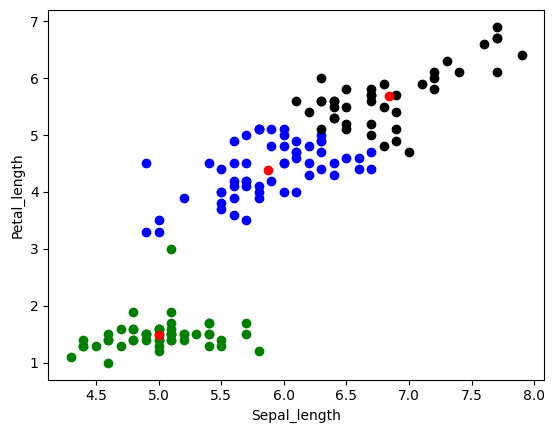

In [10]:
color=['blue','green','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["SepalLengthCm"],data["PetalLengthCm"],c=color[k])
plt.scatter(Centroids["SepalLengthCm"],Centroids["PetalLengthCm"],c='red')
plt.xlabel('Sepal_length')
plt.ylabel('Petal_length')
plt.show()